# 实际搭建并训练一个简单的神经网络

作者：杨岱川

时间：2019年12月

github：https://github.com/DrDavidS/basic_Machine_Learning

开源协议：[MIT](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/LICENSE)

参考文献：

- 《深度学习入门》，作者：斋藤康毅；
- 《深度学习》，作者：Ian Goodfellow 、Yoshua Bengio、Aaron Courville。
- [Keras overview](https://tensorflow.google.cn/guide/keras/overview)
- [PYTORCH TUTORIALS](https://pytorch.org/tutorials/)

### 学习回顾

在 [3.01 神经网络与前向传播](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/03深度学习基础/3.01%20神经网络与前向传播.ipynb) 中，我们学习了如何搭建一个三层的全连接神经网络，并且实现了它的前向传播过程。

在 [3.02 神经网络的训练](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/03深度学习基础/3.02%20神经网络的训练.ipynb)中，我们主要学习了如何使用数值微分的方法计算神经网络的梯度，并通过随机梯度下降法去优化神经网络的参数。

在 [3.03 误差反向传播法](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/03深度学习基础/3.03%20误差反向传播法.ipynb)中，我们主要学习了计算图的原理，以及如何使用计算图的**反向传播**高效地计算导数，并且实现了加法乘法以及部分简单函数的反向传播推导。

可以说到目前为止，全连接神经网络的最重要的几个数学原理我们已经有部分概念了。可能你记不得具体某个公式怎么写，某个函数怎么编程，这些都没有关系。关键在于，你知道这些名词的**概念**和用途，并且你知道有朝一日要在实际工作和科研中运用的时候去哪里**查询**具体用法。

熟练来自于长期的积累，我们现在只走出了第一步。

### 学习目标

在上述三份 notebook 中，我们基本都是用 Python 亲手实现了前向传播和反向传播的各个过程和结构。但是在实际科研和工作中，我们并没有如此多的时间或精力去 “手写” 这么一份网络结构代码。

更常见的情况是，我们会使用各种成熟的深度学习框架系统来完成对网络结构的搭建，比如大家熟悉的 TensorFlow2.0 或者 PyTorch 。

对于这两个框架我就不多介绍了，我们在 [3.01 神经网络与前向传播](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/03深度学习基础/3.01%20神经网络与前向传播.ipynb) 中已经有过初步接触。不过那时候我们只是实现了一个最简单的三层全连接神经网络，然后实验了一下前向传播的计算过程，并没有涉及训练和优化等更多内容。

在学习了 “随机梯度下降法” 和 “误差反向传播” 法地理论基础以后，我们终于可以正式地在深度学习框架中运用这些方法技巧，完成训练。

本章节的目标就是：**运用深度学习框架搭建一个神经网络模型，实现对简单数据集的训练和预测。**

## 数据集准备

### MNIST 数据集

首先向大家介绍 [MNIST 手写数字数据集](http://yann.lecun.com/exdb/mnist/)。

MNIST 手写数字数据集在机器学习界可以说是无人不知无人不晓。美国国家标准与技术研究院（National Institute of Standards and Technology，NIST），而 MNIST 就是 “Modified National Institute of Standards and Technology” 的缩写。

此数据集自1999年发布以来，已经成为了图像分类领域的基础数据集。随着技术不断进步，各种新分类方法不断出现，MNIST 数据集成为了检验这些方法的常用数据集之一。

MINIST实验包含了四个文件，其中`train-images-idx3-ubyte`是 60000 个图片样本，`train-labels-idx1-ubyte`是这 60000 个图片对应的数字标签，`t10k-images-idx3-ubyte` 是用于测试的样本，`t10k-labels-idx1-ubyte` 是测试样本对应的数字标签。

这份数据集采集自美国人口调查局的员工和高中生，内容为 0-9 一共十个数字的手写体。我们的任务就是从成千上万的数字中训练并构建一个模型，能识别这些图像中的手写数字。

MNIST的图像数据是28像素×28像素的灰度图像（1通道），各个像素的取值在0到255之间。每个图像都相应地标有“1”、“2”、“3”等标签。

很多框架中已经内置了 MNIST 数据集，调用十分方便：

- TensorFlow：[tfds.image.mnist.MNIST](https://tensorflow.google.cn/datasets/catalog/mnist?hl=en)
- PyTorch：[torchvision.datasets.MNIST](https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=mnist#torchvision.datasets.MNIST)


### 下载 MNIST 数据集

在 MNIST 数据集官网可以直接下载数据集：http://yann.lecun.com/exdb/mnist/

共有四个文件，如下：

```
- train-images-idx3-ubyte.gz:  training set images (9912422 bytes) 
- train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) 
- t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) 
- t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)
```

四个文件夹以压缩文件的形式存在，可以将其解压，一般来说，直接使用框架内置的 MNIST 则不必执行这一步，深度学习框架会帮我们下载好这些数据集。

### 读取数据集

我们首先以 PyTorch 框架为基础，向大家展示使用 MNIST 数据集训练神经网络模型的流程。

由于 `torchvision.datasets.MNIST` 内置了 MNIST 数据集的读取接口，我们会直接调用：

```Python
from torchvision import datasets
datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)
```

其中：
- root：指的是下载路径，这里人工指定为你所需要的路径。
- train：True就是训练集，False就是测试集
- download：True指的是如果没有数据集则下载，如果有就不下载。
- transform：指的是数据变换增强，比如翻转，拉伸等等。在这一步我们**先检查数据**，不使用。

In [1]:
import argparse
import os

import matplotlib.pyplot as plt 
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
file1 = "../datasets/MNIST/MNIST/raw/t10k-images-idx3-ubyte"
file2 = "../datasets/MNIST/MNIST/raw/t10k-labels-idx1-ubyte"
file3 = "../datasets/MNIST/MNIST/raw/train-images-idx3-ubyte"
file4 = "../datasets/MNIST/MNIST/raw/train-labels-idx1-ubyte"
root = "../datasets/MNIST/"

In [3]:
if os.path.exists(file1) and os.path.exists(file2) and os.path.exists(file3) and os.path.exists(file4):
    mnist_trainset = datasets.MNIST(root=root, train=True, download=False, transform=None)
    mnist_testset = datasets.MNIST(root=root, train=False, download=False, transform=None)
else:
    mnist_trainset = datasets.MNIST(root=root, train=True, download=True, transform=None)
    mnist_testset = datasets.MNIST(root=root, train=False, download=True, transform=None) 

下载完毕后，检查一下数据集有多大，并且看看数据集训练集的第一条信息。

In [4]:
print(len(mnist_trainset))
print(len(mnist_testset))

60000
10000


In [5]:
print(mnist_trainset[0])
print(type(mnist_trainset[0]))

(<PIL.Image.Image image mode=L size=28x28 at 0x1F65FA15288>, 5)
<class 'tuple'>


可以看出，数据集的训练集共有60000张图片，而测试集共有10000张图片。

图片的类型都是 PIL.Image，以 tuple 形式保存。

现在我们要读取测试集第一张图片 `mnist_testset[0]`：

该图片的标签是：  7


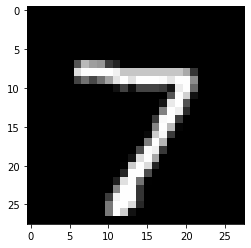

In [6]:
test_image_zero, test_target_zero = mnist_testset[0]
plt.imshow(test_image_zero, cmap ='gray')  # 灰度图像
print("该图片的标签是： ",test_target_zero)

我们已经知道，MNIST 数据集是灰度图像，而绘制出的结果也确实如此。上图展示的图片，很容易看出是一个手写的阿拉伯数字 “7”，分辨率是 $28\times28$。

## 数据集加载

在下载完毕 MNIST 数据集以后，我们要如何将数据放入神经网络中呢？

之前我们讲过，由于计算机的内存有限，在面对大规模数据集时不能一次性将所有数据放入模型进行训练，所以我们采用 mini-batch 的形式读取并训练数据集。

所以现在我们的任务是创建一个**数据迭代器（Data Iterator）**，这个迭代器的作用是每次从数据集中挑选一定量的子集（mini-batch）放入神经网络进行训练，完成这一个 batch 的训练后再挑选另一个子集的数据继续训练。

一个子集的大小叫做 “**batch size**”，它是一个超参数，具体的值需要根据显存（内存）大小来设置。

### 数据迭代器 DataLoader

PyTorch 已经为我们提供了这么一个数据迭代器类型，叫做`torch.utils.data.DataLoader`。有了这个 `DataLoader`，我们可以非常方便地把我们的数据以 mini-batch 的形式读取进来。

首先我们来看看 [DataLoader] 的结构：

```python
torch.utils.data.DataLoader(dataset, 
                            batch_size=1, 
                            shuffle=False, 
                            sampler=None, 
                            batch_sampler=None, 
                            num_workers=0, 
                            collate_fn=None, 
                            pin_memory=False, 
                            drop_last=False, 
                            timeout=0, 
                            worker_init_fn=None, 
                            multiprocessing_context=None)
```

看起来 `Dataloader` 内的参数非常多，但是在这里我们只关注几个最重要的参数，其他参数在以后需要使用的时候再讲解。

- **dataset** ([*Dataset*](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.Dataset)) – 我们将要读取的数据集。

- **batch_size** (*int, optional*) – 每一个batch中要读取多少个数据 (default: 1)。

- **shuffle** (*bool, optional*) – 在默认情况下，是按顺序进行采样的。如果要在每个 epoch 中随机打乱采样顺序，设置为`True` (default: False)。

### Tensor 格式转换

在 `torchvision.transforms` 模块中提供了非常多的图像变换、图像增强方法，包括亮度增强、拉伸缩放、旋转翻转等等。关于图像增强的方法，我们在此暂不涉及，这里我们仅仅采用 `transforms` 中的 `to_tensor()` 函数将 PIL 图像转变为 tensor 形式。

`to_tensor()` 函数将每一张 $28\times28$ 像素的手写数字图片中的灰度信息变为 tensor 的形式。 

> **Tensor**，中文名叫**张量**，是包含单一数据类型的多维矩阵，和 NumPy 中的 `np.array()` 非常类似。在 TensorFlow 和 PyTorch 中主要采用的数据结构就是tensor。具体的，PyTorch Tensor 在 CPU 和 GPU 上各有9种数据类型，可以参见[TORCH.TENSOR](https://pytorch.org/docs/stable/tensors.html#torch.Tensor)。

我们尝试将测试集第一张图片 “7” 转换为 tensor 的形式：

In [7]:
print(transforms.functional.to_tensor(test_image_zero))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [8]:
print(transforms.functional.to_tensor(test_image_zero).shape)

torch.Size([1, 28, 28])


In [9]:
print(transforms.functional.to_tensor(test_image_zero).shape[0])

1


在知道 `to_tensor()` 的工作原理之后，我们将数据转换为 tensor 并转入迭代器的步骤如下：

In [10]:
file1 = "../datasets/MNIST/MNIST/raw/t10k-images-idx3-ubyte"
file2 = "../datasets/MNIST/MNIST/raw/t10k-labels-idx1-ubyte"
file3 = "../datasets/MNIST/MNIST/raw/train-images-idx3-ubyte"
file4 = "../datasets/MNIST/MNIST/raw/train-labels-idx1-ubyte"
root = "../datasets/MNIST/"

In [11]:
# PIL to Tensor
data_tf = transforms.Compose([transforms.ToTensor()])

# 准备数据集
if os.path.exists(file1) and os.path.exists(file2) and os.path.exists(file3) and os.path.exists(file4):
    print("已经下载。")
    mnist_trainset = datasets.MNIST(root=root, train=True, download=False, transform=data_tf)
    mnist_testset = datasets.MNIST(root=root, train=False, download=False, transform=data_tf)
else:
    print("需要下载。")
    mnist_trainset = datasets.MNIST(root=root, train=True, download=True, transform=None)
    mnist_testset = datasets.MNIST(root=root, train=False, download=True, transform=None) 

# 放入迭代器
train_loader = DataLoader(mnist_trainset, batch_size=1000, shuffle=True)
test_loader = DataLoader(mnist_testset, batch_size=1000, shuffle=True)

已经下载。


构建好了训练集和测试集的迭代器以后，我们就做好了数据的准备工作了。

## 搭建网络结构

在 [3.01 神经网络与前向传播](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/03深度学习基础/3.01%20神经网络与前向传播.ipynb) 中，我们当时搭建了一个非常简单的三层神经网络，每一层神经元只有仅仅两三个。

神经元的数量少，有利于我们推导前向传播公式，理解神经网络结构，但要解决真实问题却不太够。因此今天我们将要搭建一个神经元更多一些的三层神经网络，如下图：

![三层网络](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/back_up_images/%E4%B8%89%E5%B1%82%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C-%E5%A4%9A%E4%B8%AA%E7%A5%9E%E7%BB%8F%E5%85%83.png?raw=true)

可以看到，在全连接层中，随着神经元的增加，神经网络变得更加复杂了起来。但是层数依旧是三层。

> 需要注意的是，在输出层我们采用了 `softmax` 函数，以输出图像每个数字分类的概率。

现在我们按照上图中的说明，正式开始搭建神经网络：

In [12]:
class Net(nn.Module):
    """定义神经网络Net"""
    def __init__(self):
        """初始化各个层"""
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_features=28*28, out_features=100)
        self.fc2 = nn.Linear(in_features=100, out_features=50)
        self.fc3 = nn.Linear(in_features=50, out_features=10)

    def forward(self, x):
        """定义前向传播"""
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

### 检查系统状态

检查 PyTorch 版本和 GPU 状态：

In [13]:
print(f"PyTorch 版本： {torch.__version__}")
print("Is CUDA available: ", torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    n_gpu = torch.cuda.device_count()
    print("GPU numbers: ", n_gpu)
    print("device_name: ", torch.cuda.get_device_name(0))

PyTorch 版本： 1.3.1
Is CUDA available:  False


### 优化器的设置

首先，我们需要将定义好的神经网络模型放入 `device` 中，这个 `device` 之前已经由我们编程选择好了，如果电脑的GPU可用，则会选择放入GPU，如果不可用则会选择放入CPU。

其次我们需要给神经网络选择一个优化器。之前我们学习过，普通的神经网络会最常见的的优化方法就是随机梯度下降法（Stochastic Gradient Descent，SGD），从而减小损失函数。因此这里我们也使用随机梯度下降法来作为我们的优化器。后续我们会讨论其他类型的优化器。

> 实际上还有很多优化器，SGD 只是最常见的优化器之一。可以参见[TORCH.OPTIM](https://pytorch.org/docs/stable/optim.html?highlight=sgd#module-torch.optim)。

In [14]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(),    # 模型参数
                      lr=0.03,               # 学习率
                      momentum=0)            # 动量

### 定义训练函数

在设置完毕优化器之后，我们开始定义整个模型需要如何训练。

#### model.train()

需要了解的是，PyTorch 的模型在训练之前需要使用命令

```python
model.train()
```

来对模型开启训练模式。

#### 将 mini-batch 数据放入device

之前我们使用 `to(device)` 命令将模型放入了 device 中（这里 device 是 CPU）。我们还需要将训练数据和标签也放入 device 中。这样一来，模型和数据都在 device 中，我们的模型才能正常读取数据并训练。

由于之前我们将数据和标签放入了一个迭代器中，所以要分批获取这些数据并放入 device 中。故这里需要使用一个 `for` 循环，按 batch_size 处理我们的数据。

> **重要**：关于数据维度的变化：`data = data.view(data.shape[0], -1)` 的操作，将原本是 $28\times28$ 的图像拉平（flatten）到了 $768$。因为在我们定义的神经网络中，第一层接受的是一个 $768$ 维的输入，而 data 原本的维度是 $1000\times1\times28\times28$。

#### 梯度归零

在 PyTorch 训练过程中，每训练一个 batch 的数据，我们的优化器需要使用 `optimizer.zero_grad()` 进行梯度归零。回顾之前学习的梯度下降法，每次学习的梯度只对本 batch 数据负责，到了下一个 batch 我们又需要将梯度归零，然后重新计算梯度。

如果不执行梯度归零，那么每个 batch 的梯度会累加起来，导致结果出错。

#### 反向传播

接下来我们定义损失函数。这里我们采用的是 [NLLLoss](https://pytorch.org/docs/stable/nn.functional.html?highlight=nll_loss#torch.nn.functional.nll_loss)，即 “Negative Log Likelihood loss”。它和之前的交叉熵损失函数（Cross Entropy Loss）是一回事。在 PyTorch 中，[torch.nn.CrossEntropyLoss()](https://pytorch.org/docs/stable/nn.html?highlight=crossentropyloss#torch.nn.CrossEntropyLoss) 结合了 `nn.LogSoftmax()` 和 `nn.NLLLoss()`。

换句话说，`torch.nn.CrossEntropyLoss()` 会额外计算一次 softmax ，由于我们在网络的末尾定义了 log_softmax() 输出，所以只需要 `nn.NLLLoss()` 就足够了。

最后我们要记得使用 `optimizer.step()` 更新模型的参数。[torch.optim.Optimizer.step](https://pytorch.org/docs/stable/optim.html?highlight=optimizer%20step#torch.optim.Optimizer.step) 表示单步（一个 batch 的数据）更新模型的参数。

#### 打印 loss 值

有时候我们需要在训练过程中看看模型的 loss 是否在下降，所以采用打印 loss 的方式来观察，简单有效。

In [15]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)  # 从 28*28 转换为 768
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [16]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:            
            data, target = data.to(device), target.to(device)
            data = data.view(data.shape[0], -1)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(f'\nTest set: Average loss: {test_loss}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset)}%)\n')

In [17]:
for epoch in range(1, 10):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

#if (args.save_model):
#    torch.save(model.state_dict(),"mnist_cnn.pt")

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316802
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.272415
Train Epoch: 1 [20000/60000 (33%)]	Loss: 2.236447
Train Epoch: 1 [30000/60000 (50%)]	Loss: 2.186664
Train Epoch: 1 [40000/60000 (67%)]	Loss: 2.143221
Train Epoch: 1 [50000/60000 (83%)]	Loss: 2.077999

Test set: Average loss: 2.0159156616210936, Accuracy: 6224/10000 (62.24%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.013845
Train Epoch: 2 [10000/60000 (17%)]	Loss: 1.945199
Train Epoch: 2 [20000/60000 (33%)]	Loss: 1.877959
Train Epoch: 2 [30000/60000 (50%)]	Loss: 1.772789
Train Epoch: 2 [40000/60000 (67%)]	Loss: 1.675168
Train Epoch: 2 [50000/60000 (83%)]	Loss: 1.557665

Test set: Average loss: 1.4325026123046876, Accuracy: 6807/10000 (68.07%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.440722
Train Epoch: 3 [10000/60000 (17%)]	Loss: 1.355411
Train Epoch: 3 [20000/60000 (33%)]	Loss: 1.268090
Train Epoch: 3 [30000/60000 (50%)]	Loss: 1.164411
Train Epoch: 3 [40000/60000 (67%)]	Loss: 1.108160
Train Epoch: 

## 保存模型

https://pytorch.org/tutorials/beginner/saving_loading_models.html?highlight=save

In [ ]:
# 保存模型

output_dir = "./model_3.04_save"
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
torch.save(model_to_save.state_dict(), os.path.join(output_dir, 'training_args.bin'))